# **IMPORT LIBRARIES**

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import re
from collections import Counter

from scipy.stats import ttest_ind

# **DATA CLEANING**

In [2]:
transaction_data = pd.read_excel('QVI_transaction_data.xlsx')

In [3]:
transaction_data.info()
transaction_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [4]:
transaction_data.describe(include='all')

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836,264836.000000,264836.000000
unique,NaN,NaN,NaN,NaN,NaN,114,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3304,NaN,NaN
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,NaN,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,NaN,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,NaN,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,NaN,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,NaN,2.000000,9.200000


In [5]:
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin="1899-12-30", unit="D")

In [6]:
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction_data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [8]:
chips_mask = transaction_data["PROD_NAME"].str.contains("CHIP", na=False, case=False)

# Count chips vs non-chips
print("Chips:", chips_mask.sum())
print("Not Chips:", (~chips_mask).sum())

Chips: 74570
Not Chips: 190266


In [9]:
transaction_data[~chips_mask]["PROD_NAME"].head()

1                    CCs Nacho Cheese    175g
4    Kettle Tortilla ChpsHny&Jlpno Chili 150g
5    Old El Paso Salsa   Dip Tomato Mild 300g
7       Grain Waves         Sweet Chilli 210g
9       Grain Waves Sour    Cream&Chives 210G
Name: PROD_NAME, dtype: object

In [10]:
# Join all product names into one big string
all_text = " ".join(transaction_data["PROD_NAME"])

# Tokenize: split on spaces, remove non-letters, lowercase
words = re.findall(r"[A-Za-z]+", all_text.lower())

# Optional: remove stopwords like "g", "ml" if you want
stopwords = {"g", "ml"}  # add more if needed
words = [w for w in words if w not in stopwords]

# Count frequencies
word_counts = Counter(words)

# Convert to DataFrame for easy viewing
word_df = pd.DataFrame(word_counts.items(), columns=["word", "count"]).sort_values(by="count", ascending=False)

print(word_df.head(20)) 

         word  count
10      chips  49770
16     kettle  41288
7      smiths  28860
28       salt  27976
6      cheese  27890
66   pringles  25102
34    doritos  24962
8     crinkle  23960
35       corn  22063
48   original  21560
9         cut  20754
1        chip  18645
11    chicken  18577
24      salsa  18094
14      cream  16926
33     chilli  15390
60        sea  14145
45      thins  14075
38       sour  13882
111    crisps  12607


In [11]:
salsa_dip_mask = (
    transaction_data["PROD_NAME"].str.contains("salsa", case=False, na=False) &
    transaction_data["PROD_NAME"].str.contains("dip", case=False, na=False)
)
len(transaction_data[salsa_dip_mask])

9324

In [12]:
chip_transaction = transaction_data[~salsa_dip_mask]
chip_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [13]:
chip_transaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 255512 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            255512 non-null  datetime64[ns]
 1   STORE_NBR       255512 non-null  int64         
 2   LYLTY_CARD_NBR  255512 non-null  int64         
 3   TXN_ID          255512 non-null  int64         
 4   PROD_NBR        255512 non-null  int64         
 5   PROD_NAME       255512 non-null  object        
 6   PROD_QTY        255512 non-null  int64         
 7   TOT_SALES       255512 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 17.5+ MB


In [14]:
chip_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,255512,255512.000000,2.555120e+05,2.555120e+05,255512.000000,255512.000000,255512.000000
mean,2018-12-30 02:05:04.442844160,135.069715,1.355385e+05,1.351492e+05,56.445729,1.907225,7.215434
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.003075e+04,6.766875e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303540e+05,1.351235e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030782e+05,2.026292e+05,86.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.751389,8.054947e+04,7.810313e+04,33.405874,0.652135,3.085918


There is one outlier in "PROD_QTY". Did the customer buy 200 packs of chips in one go or is this any sort of typo?

In [15]:
chip_transaction["PROD_QTY"].value_counts()

PROD_QTY
2      227684
1       26590
5         435
3         418
4         383
200         2
Name: count, dtype: int64

In [16]:
chip_transaction[chip_transaction["PROD_QTY"] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


These 2 transactions are the only outliers in PROD_NAME and this also explains the outliers in TOT_SALES as well.
These 2 transactions look like legit transactions and they are both made by the same customers. 

In [17]:
chip_transaction[chip_transaction["LYLTY_CARD_NBR"] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


The customer only made these 2 transactions, maybe for some sort of commercial purposes and not a frequent customers -> remove this Loyalty Card Number out of the data.

In [18]:
chip_transaction = chip_transaction[chip_transaction["LYLTY_CARD_NBR"] != 226000]
chip_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,255510,255510.000000,2.555100e+05,2.555100e+05,255510.000000,255510.000000,255510.000000
mean,2018-12-30 02:05:01.796407040,135.069003,1.355378e+05,1.351484e+05,56.446139,1.905675,7.210402
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,2018-09-30 00:00:00,70.000000,7.003025e+04,6.766825e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303540e+05,1.351225e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030778e+05,2.026278e+05,86.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.751267,8.054938e+04,7.810302e+04,33.405683,0.343691,2.507754


In [19]:
chip_transaction.nunique()

DATE                 364
STORE_NBR            272
LYLTY_CARD_NBR     71944
TXN_ID            253911
PROD_NBR             111
PROD_NAME            111
PROD_QTY               5
TOT_SALES            107
dtype: int64

In [20]:
full_range = pd.date_range(
    start=chip_transaction["DATE"].min(),
    end=chip_transaction["DATE"].max(),
    freq="D"
)

# Get unique transaction dates
existing_dates = chip_transaction["DATE"].dt.normalize().unique()

# Find missing dates
missing_dates = full_range.difference(existing_dates)

print("Number of missing dates:", len(missing_dates))
print("Example missing dates:", missing_dates[:10])

Number of missing dates: 1
Example missing dates: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


This seems like all stores closed on Christmas 2018. 

<Axes: xlabel='DATE'>

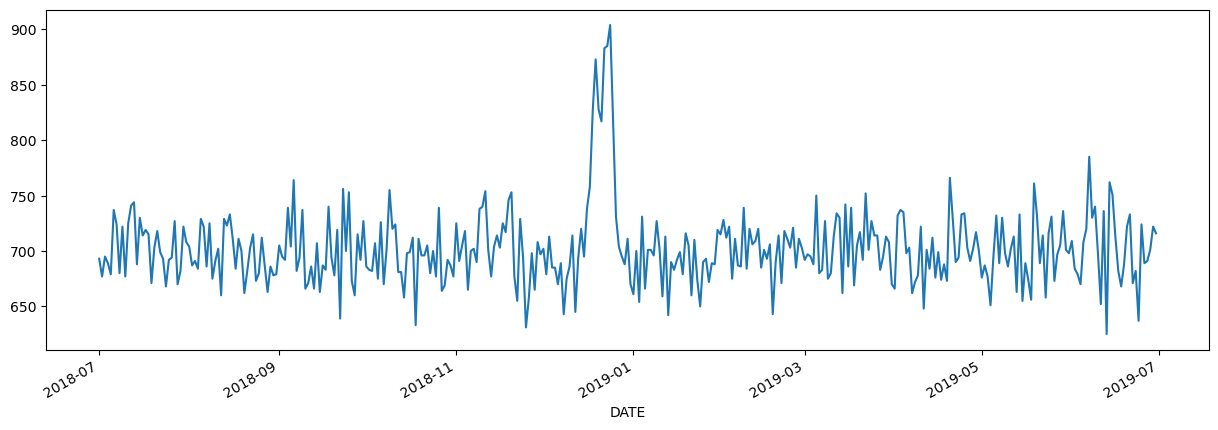

In [21]:
chip_transaction["DATE"].value_counts().sort_index().plot(kind="line", figsize=(15,5))

Purchasing frequencies shot up as it approached Christmas and then went down to normal levels after the whole holiday was over.

In [22]:
chip_transaction["PROD_SIZE"] = chip_transaction["PROD_NAME"].str.extract(r"(\d+)\s*g", flags=re.IGNORECASE).astype(int)

In [23]:
chip_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


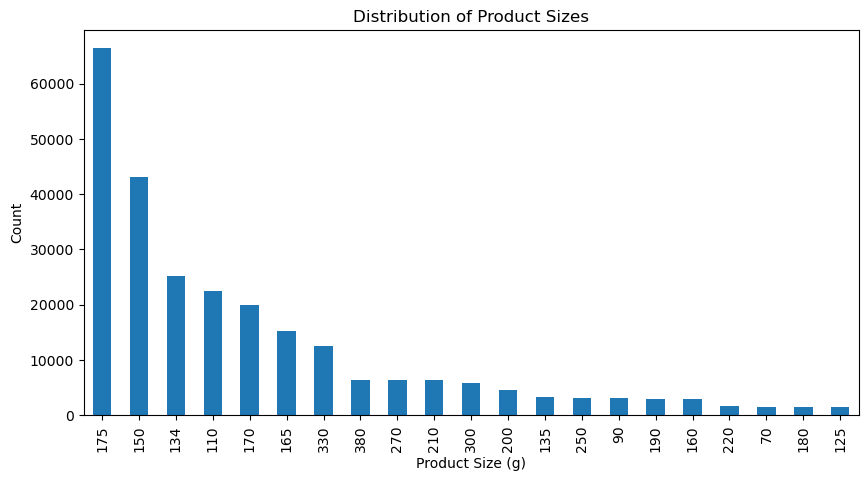

In [24]:
chip_transaction["PROD_SIZE"].value_counts().plot(kind="bar", figsize=(10,5))
plt.xlabel("Product Size (g)")
plt.ylabel("Count")
plt.title("Distribution of Product Sizes");

In [25]:
chip_transaction["PROD_SIZE"].isnull().sum()

np.int64(0)

In [26]:
words = []
for name in chip_transaction["PROD_NAME"]:
    tokens = re.findall(r"[A-Za-z]+", name)
    words.append(tokens[0])  # first word as candidate brand

Counter(words).most_common(30)

[('Kettle', 41288),
 ('Smiths', 28860),
 ('Pringles', 25102),
 ('Doritos', 24962),
 ('Thins', 14075),
 ('RRD', 11894),
 ('Infuzions', 11057),
 ('WW', 10320),
 ('Cobs', 9693),
 ('Tostitos', 9471),
 ('Twisties', 9454),
 ('Tyrrells', 6442),
 ('Grain', 6272),
 ('Natural', 6050),
 ('Red', 5885),
 ('Cheezels', 4603),
 ('CCs', 4551),
 ('Woolworths', 4437),
 ('Dorito', 3183),
 ('Infzns', 3144),
 ('Smith', 2963),
 ('Cheetos', 2927),
 ('Snbts', 1576),
 ('Burger', 1564),
 ('GrnWves', 1468),
 ('Sunbites', 1432),
 ('NCC', 1419),
 ('French', 1418)]

In [27]:
chip_transaction["BRAND_RAW"] = chip_transaction["PROD_NAME"].str.split().str[0].str.strip()

# Map common variants to standard brand names
brand_map = {
    "Red": "Red Rock Deli",
    "RRD": "Red Rock Deli",
    "Grain": "Grain Waves",
    "GrnWves": "Grain Waves",
    "Smiths": "Smiths",
    "Smith": "Smiths",   # sometimes misspelled
    "Doritos": "Doritos",
    "CCs": "CCs",
    "Kettle": "Kettle",
    "Thins": "Thins",
    "Pringles": "Pringles",
    "Twisties": "Twisties",
    "Cheezels": "Cheezels",
    "Burger": "Burger Rings",
    "Natural": "Natural ChipCo",
    "Infzns": "Infuzions",
    "NCC": "NCC",
    "WW": "Woolworths"}

chip_transaction["BRAND"] = chip_transaction["BRAND_RAW"].map(brand_map).fillna(chip_transaction["BRAND_RAW"])

chip_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND_RAW,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,Natural ChipCo
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,Kettle


In [28]:
chip_transaction.drop(columns=["BRAND_RAW"], inplace=True)
chip_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural ChipCo
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


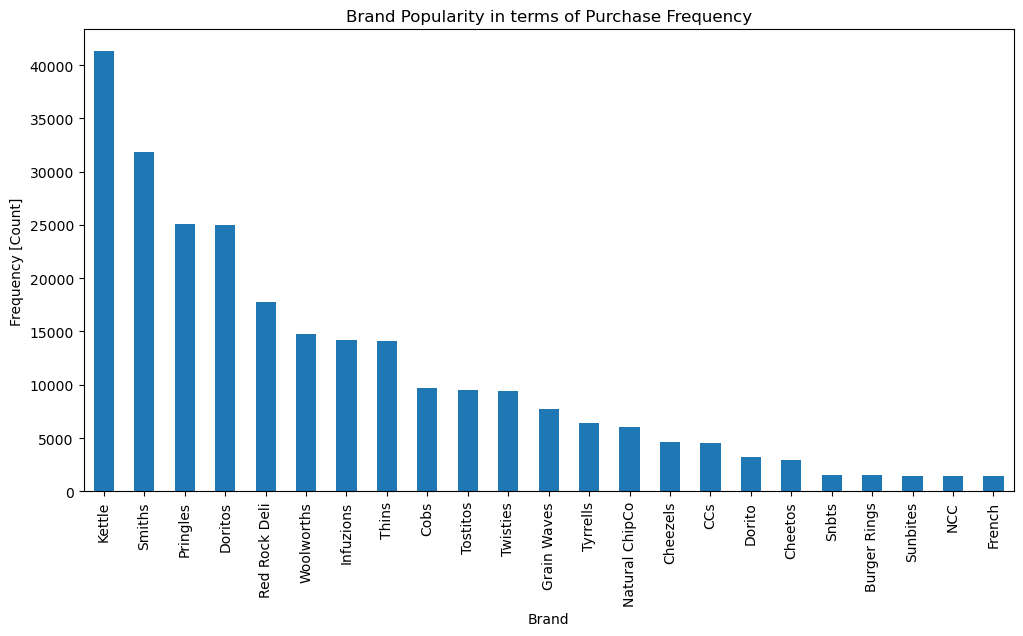

In [29]:
chip_transaction["BRAND"].value_counts().plot(kind="bar", figsize=(12,6))
plt.xlabel("Brand")
plt.ylabel("Frequency [Count]")
plt.title("Brand Popularity in terms of Purchase Frequency");

In [30]:
behavior_data = pd.read_csv('QVI_purchase_behaviour.csv')
behavior_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [31]:
behavior_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
behavior_data.nunique()

LYLTY_CARD_NBR      72637
LIFESTAGE               7
PREMIUM_CUSTOMER        3
dtype: int64

In [33]:
behavior_data["LIFESTAGE"].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

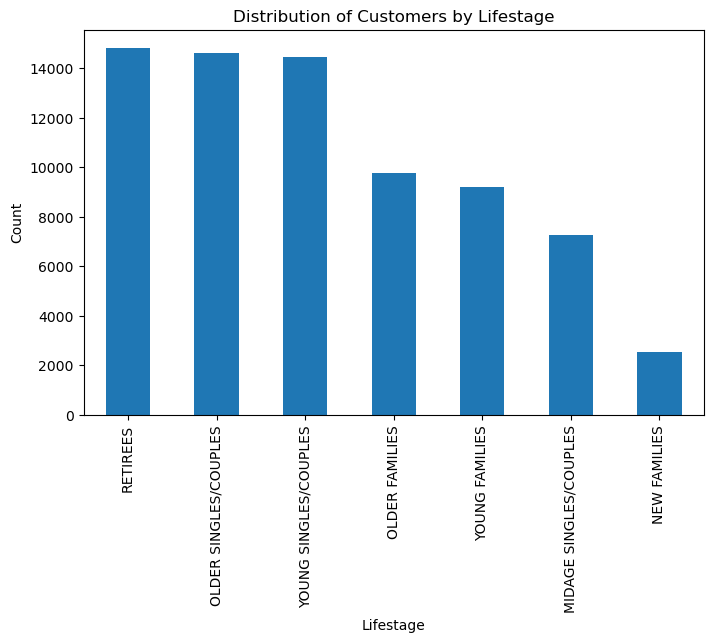

In [34]:
behavior_data["LIFESTAGE"].value_counts().plot(kind="bar", figsize=(8,5))
plt.xlabel("Lifestage")
plt.ylabel("Count")
plt.title("Distribution of Customers by Lifestage");

In [35]:
behavior_data["PREMIUM_CUSTOMER"].value_counts(normalize=True)*100

PREMIUM_CUSTOMER
Mainstream    40.261850
Budget        33.688065
Premium       26.050085
Name: proportion, dtype: float64

In [36]:
df = pd.merge(chip_transaction, behavior_data, on="LYLTY_CARD_NBR", how="inner")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255510 entries, 0 to 255509
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              255510 non-null  datetime64[ns]
 1   STORE_NBR         255510 non-null  int64         
 2   LYLTY_CARD_NBR    255510 non-null  int64         
 3   TXN_ID            255510 non-null  int64         
 4   PROD_NBR          255510 non-null  int64         
 5   PROD_NAME         255510 non-null  object        
 6   PROD_QTY          255510 non-null  int64         
 7   TOT_SALES         255510 non-null  float64       
 8   PROD_SIZE         255510 non-null  int64         
 9   BRAND             255510 non-null  object        
 10  LIFESTAGE         255510 non-null  object        
 11  PREMIUM_CUSTOMER  255510 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 23.4+ MB


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PROD_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural ChipCo,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [37]:
print(f"Drop {len(transaction_data) - len(df)} observations during cleaning, corresponding to {((len(transaction_data) - len(df)) / len(transaction_data)) * 100:.2f}% of the original data.")

Drop 9326 observations during cleaning, corresponding to 3.52% of the original data.


In [38]:
df.to_csv('chip_behavior_data.csv', index=False)

# **EXPLORATORY DATA ANALYSIS**

Questions to ask:
- Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is?
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What's the average chip price by customer segment?

### **TOTAL SALES**

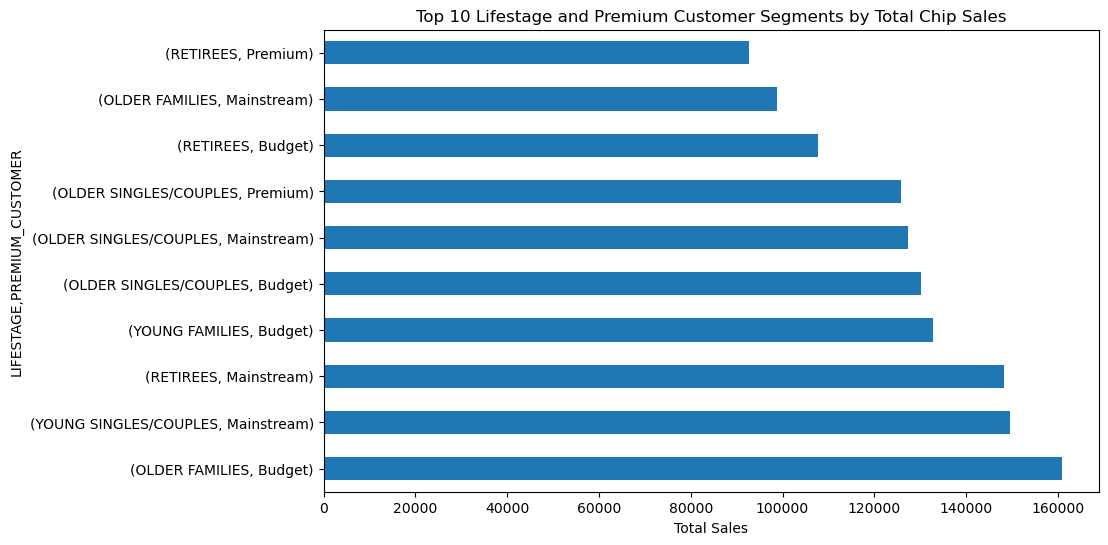

In [39]:
df.groupby(by=["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].sum().sort_values(ascending=False).head(10).plot(kind="barh", figsize=(10,6))
plt.xlabel("Total Sales")
plt.title("Top 10 Lifestage and Premium Customer Segments by Total Chip Sales")
plt.show()

Most of the top consumers of chips (by total sales) are the budget and mainstream customers, with Budget - older families being the the group with the highest consumption of chips, followed by Mainstream - Young Singles/Couples and Retirees. 

In [40]:
df["LIFESTAGE"].value_counts(normalize=True)*100

LIFESTAGE
OLDER SINGLES/COUPLES     20.560448
RETIREES                  18.756213
OLDER FAMILIES            18.396540
YOUNG FAMILIES            16.486635
YOUNG SINGLES/COUPLES     13.718837
MIDAGE SINGLES/COUPLES     9.469297
NEW FAMILIES               2.612031
Name: proportion, dtype: float64

In [41]:
df["PREMIUM_CUSTOMER"].value_counts(normalize=True)*100

PREMIUM_CUSTOMER
Mainstream    38.457595
Budget        35.205667
Premium       26.336738
Name: proportion, dtype: float64

In [42]:
df.groupby(by=["PREMIUM_CUSTOMER", "LIFESTAGE"])["TOT_SALES"].count().sort_values(ascending=False)

PREMIUM_CUSTOMER  LIFESTAGE             
Budget            OLDER FAMILIES            22402
Mainstream        RETIREES                  20702
                  YOUNG SINGLES/COUPLES     19987
Budget            YOUNG FAMILIES            18450
                  OLDER SINGLES/COUPLES     17733
Mainstream        OLDER SINGLES/COUPLES     17700
Premium           OLDER SINGLES/COUPLES     17101
Budget            RETIREES                  14632
Mainstream        OLDER FAMILIES            13770
Premium           RETIREES                  12590
Mainstream        YOUNG FAMILIES            12488
                  MIDAGE SINGLES/COUPLES    11373
Premium           YOUNG FAMILIES            11187
                  OLDER FAMILIES            10833
Budget            YOUNG SINGLES/COUPLES      8963
Premium           MIDAGE SINGLES/COUPLES     7946
                  YOUNG SINGLES/COUPLES      6103
Budget            MIDAGE SINGLES/COUPLES     4876
                  NEW FAMILIES               2898
Mainstrea

It can be seen that higher total sales are driven by higher number of people in that group.

### **AVERAGE SPENDING**

In [43]:
df.groupby(by=["PREMIUM_CUSTOMER"])["TOT_SALES"].mean().sort_values(ascending=False)

PREMIUM_CUSTOMER
Mainstream    7.272276
Premium       7.174912
Budget        7.169363
Name: TOT_SALES, dtype: float64

There's not much discrepancies among the average price of 1 purchase of 3 types of customers, yet mainstream customers are the one with the highest everage spending/purchase

In [44]:
df.groupby(by=["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"].mean().sort_values(ascending=False)

LIFESTAGE               PREMIUM_CUSTOMER
MIDAGE SINGLES/COUPLES  Mainstream          7.555460
YOUNG SINGLES/COUPLES   Mainstream          7.476920
RETIREES                Premium             7.369797
OLDER SINGLES/COUPLES   Premium             7.359362
RETIREES                Budget              7.356814
OLDER SINGLES/COUPLES   Budget              7.341724
NEW FAMILIES            Mainstream          7.226081
                        Budget              7.211266
OLDER SINGLES/COUPLES   Mainstream          7.197237
YOUNG FAMILIES          Budget              7.192995
OLDER FAMILIES          Budget              7.177701
YOUNG FAMILIES          Premium             7.177286
OLDER FAMILIES          Mainstream          7.170534
RETIREES                Mainstream          7.159243
NEW FAMILIES            Premium             7.146510
OLDER FAMILIES          Premium             7.119838
YOUNG FAMILIES          Mainstream          7.101069
MIDAGE SINGLES/COUPLES  Premium             7.027026
     

It can be seen that the Midage Singles/Couples and Young Singles/Couples (in the mainstream group) are willing to pay more per purchase of chips than their counterparts. While the Young Singles/Couples in the Premium and Budeget categories pay the least amount for a pack of chips. This difference, however, isn't huge enough to actually conclude the willingness to pay of different groups. To test for this, I will conduct a t test to see if this difference is statistically significant.
\
**H0:** There is no difference between the 2 averages.\
**H1:** There is a difference between the 2 averages.

In [60]:
# Target segment (Mainstream, Young Singles/Couples)
target = df[(df['PREMIUM_CUSTOMER'] == 'Mainstream') &
            (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

# Other customers
lowest = df[((df['PREMIUM_CUSTOMER'] == 'Budget') &
              (df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

# Compare average spend per purchase
print("Target avg per purchase:", target['TOT_SALES'].mean())
print("Others avg per purchase:", lowest['TOT_SALES'].mean())

t_stat, p_val = ttest_ind(target['TOT_SALES'], lowest['TOT_SALES'], equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_val)

Target avg per purchase: 7.476919997998699
Others avg per purchase: 6.532500278924467
t-statistic: 28.437959110560488
p-value: 1.176369243769048e-173


p-value < 0.05 -> the difference between 2 averages is statistically significant -> The Mainstream MIDAGE SINGLES/COUPLES in fact spends more per purchase of chips than the Budget YOUNG SINGLES/COUPLES. \
From the findings, the group that is among the top spender in terms of total sales and per pack of chips is the Mainstream YOUNG SINGLES/COUPLES. This is among the most potential group of loyal customers. I will deep dive into what types of chips are the most consumed by this segment.

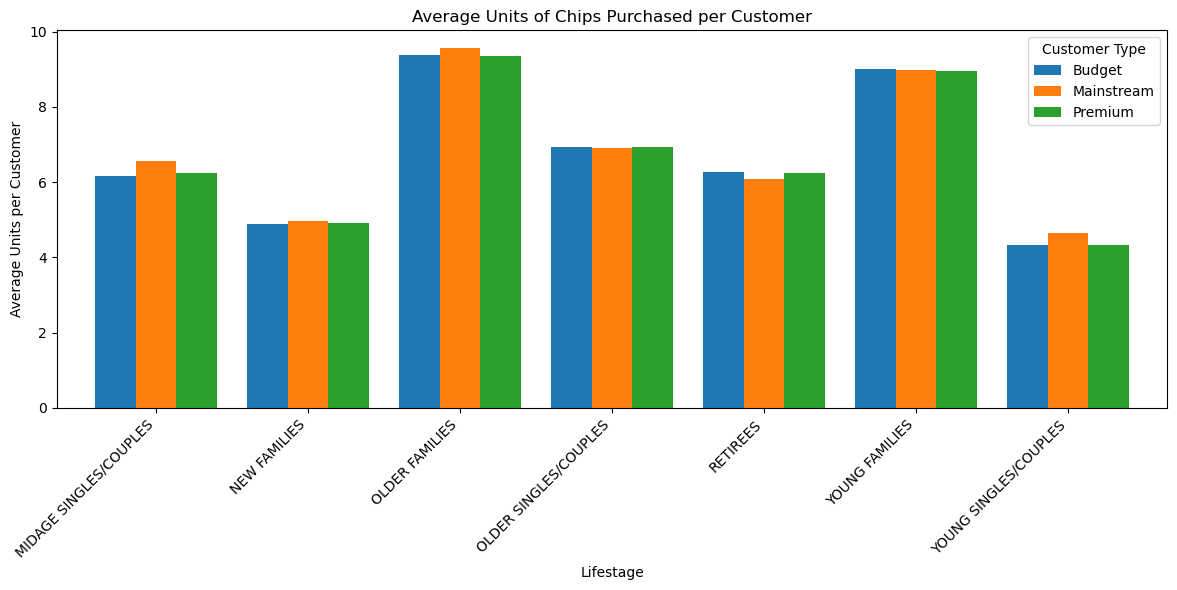

In [66]:
customer_units = df.groupby(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()

avg_units = customer_units.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].mean().reset_index()

pivot_df = avg_units.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='PROD_QTY')

pivot_df.plot(kind='bar', width=0.8, figsize=(12,6))

plt.title("Average Units of Chips Purchased per Customer")
plt.xlabel("Lifestage")
plt.ylabel("Average Units per Customer")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Customer Type")
plt.tight_layout()
plt.show();

### **BRAND**

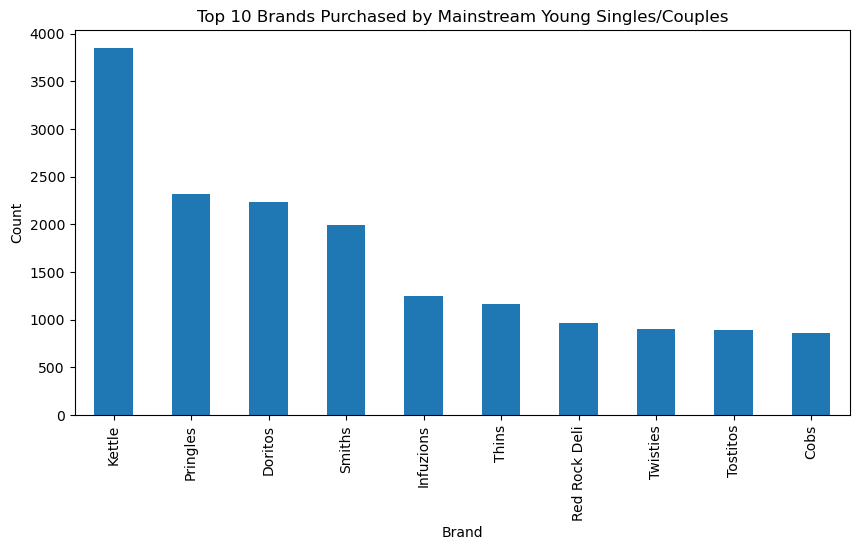

In [54]:
df[(df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df["LIFESTAGE"] == 'YOUNG SINGLES/COUPLES')]["BRAND"].value_counts().head(10).plot(kind="bar", figsize=(10,5))
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Brands Purchased by Mainstream Young Singles/Couples");

Top 3 brands that are most popular among the MAINSTREAM - YOUNG COUPLES/SINGLES
- Kettle
- Pringles
- Doritos

In [68]:
# Define target vs others
segment1 = df[(df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
              (df['PREMIUM_CUSTOMER'] == "Mainstream")]

other = df[~((df['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & 
             (df['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Compute total quantity 
quantity_segment1 = segment1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

# Brand proportions in each group 
quantity_segment1_by_brand = (
    segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index()
)
quantity_segment1_by_brand['targetSegment'] = (
    quantity_segment1_by_brand['PROD_QTY'] / quantity_segment1
)
quantity_segment1_by_brand.drop(columns='PROD_QTY', inplace=True)

quantity_other_by_brand = (
    other.groupby('BRAND')['PROD_QTY'].sum().reset_index()
)
quantity_other_by_brand['other'] = (
    quantity_other_by_brand['PROD_QTY'] / quantity_other
)
quantity_other_by_brand.drop(columns='PROD_QTY', inplace=True)

# Step 4. Merge + compute affinity
brand_proportions = pd.merge(quantity_segment1_by_brand,
                             quantity_other_by_brand,
                             on='BRAND', how='inner')

brand_proportions['affinityToBrand'] = (
    brand_proportions['targetSegment'] / brand_proportions['other']
)

# Sort by affinity 
brand_proportions = brand_proportions.sort_values('affinityToBrand', ascending=False)

print(brand_proportions)


             BRAND  targetSegment     other  affinityToBrand
5           Dorito       0.015368  0.012314         1.248009
21        Tyrrells       0.030871  0.024795         1.245064
20        Twisties       0.045186  0.036553         1.236167
10          Kettle       0.193707  0.159769         1.212421
19        Tostitos       0.044429  0.036651         1.212235
13        Pringles       0.116840  0.097118         1.203067
6          Doritos       0.112843  0.096754         1.166286
4             Cobs       0.043673  0.037684         1.158919
9        Infuzions       0.063282  0.055071         1.149096
18           Thins       0.059068  0.054995         1.074061
8      Grain Waves       0.032005  0.030098         1.063366
3         Cheezels       0.017583  0.017995         0.977070
15          Smiths       0.097475  0.126096         0.773017
7           French       0.003862  0.005557         0.695042
2          Cheetos       0.007860  0.011645         0.674932
14   Red Rock Deli      

#### **Findings:**
##### Strong over-indexed brands
- **Dorito (1.25)**, **Tyrrells (1.25)**, **Twisties (1.24)**, **Kettle (1.21)**, **Tostitos (1.21)**, **Pringles (1.20)**
  - These brands are **20–25% more likely** to be chosen by Mainstream Young Singles/Couples compared to the general population.  
  - **Interpretation:** These are the “go-to” brands for this segment. They lean more towards **flavored, well-known snack brands** (Dorito, Pringles, Twisties) and **premium-style chips** (Kettle, Tyrrells).

##### Moderate affinity
- **Infuzions (1.15)**, **Cobs (1.16)**, **Thins (1.07)**, **Grain Waves (1.06)**
  - These are slightly more popular than average, but not dramatically so.  
  - Suggests some secondary preference.

##### Neutral to under-indexed brands
- **Cheezels (0.98)** → almost neutral, no strong preference.

##### Strongly under-indexed brands
- **Smiths (0.77)**, **Red Rock Deli (0.67)**, **Natural Chip Co (0.65)**, **Woolworths private label (0.49)**, **Sunbites (0.49)**, **Burger Rings (0.45)**
  - These brands are **much less likely** to be bought by the target segment.  
  - Clear avoidance of **traditional mainstream (Smiths)** and **value/private label brands (Woolworths)**.  
  - Also weaker preference for **healthier or niche brands** (Natural Chip Co, Sunbites).


### **SIZES**

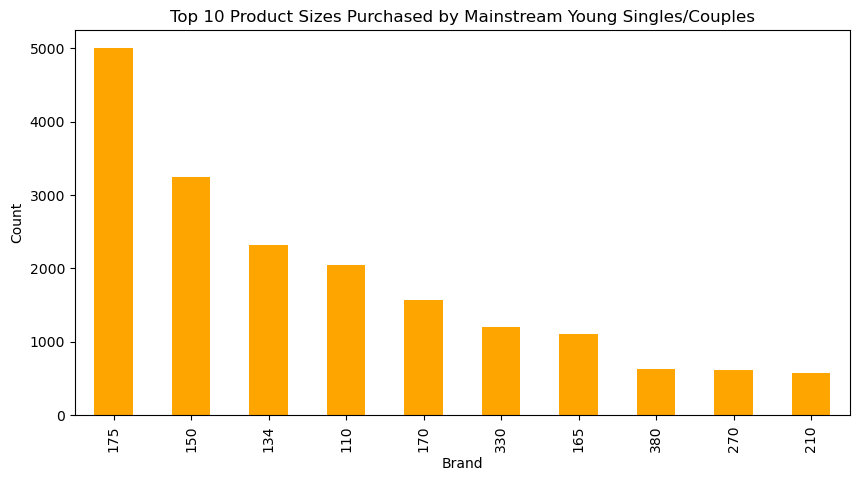

In [63]:
df[(df['PREMIUM_CUSTOMER'] == 'Mainstream') & (df["LIFESTAGE"] == 'YOUNG SINGLES/COUPLES')]["PROD_SIZE"].value_counts().head(10).plot(kind="bar", color ="orange", figsize=(10,5))
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 10 Product Sizes Purchased by Mainstream Young Singles/Couples");

In [69]:
quantity_segment1_by_size = (
    segment1.groupby('PROD_SIZE')['PROD_QTY'].sum().reset_index()
)
quantity_segment1_by_size['targetSegment'] = (
    quantity_segment1_by_size['PROD_QTY'] / quantity_segment1
)
quantity_segment1_by_size.drop(columns='PROD_QTY', inplace=True)

quantity_other_by_size = (
    other.groupby('PROD_SIZE')['PROD_QTY'].sum().reset_index()
)
quantity_other_by_size['other'] = (
    quantity_other_by_size['PROD_QTY'] / quantity_other
)
quantity_other_by_size.drop(columns='PROD_QTY', inplace=True)

# Merge + compute affinity
size_proportions = pd.merge(quantity_segment1_by_size,
                            quantity_other_by_size,
                            on='PROD_SIZE', how='inner')

size_proportions['affinityToSize'] = (
    size_proportions['targetSegment'] / size_proportions['other']
)

# Sort by affinity
size_proportions = size_proportions.sort_values('affinityToSize', ascending=False)

print(size_proportions)

    PROD_SIZE  targetSegment     other  affinityToSize
17        270       0.031141  0.024219        1.285812
20        380       0.031465  0.024690        1.274398
19        330       0.059959  0.048409        1.238597
4         134       0.116840  0.097118        1.203067
2         110       0.103984  0.086654        1.199992
14        210       0.028494  0.024243        1.175337
5         135       0.014450  0.012619        1.145117
16        250       0.014045  0.012334        1.138685
9         170       0.079028  0.078156        1.011151
10        175       0.249480  0.260572        0.957431
6         150       0.161864  0.169331        0.955901
8         165       0.054450  0.060092        0.906107
12        190       0.007319  0.012007        0.609579
11        180       0.003511  0.005855        0.599712
18        300       0.013937  0.023321        0.597594
7         160       0.006266  0.011941        0.524768
1          90       0.006212  0.012141        0.511672
3         

#### **Findings**

##### Strongly Over-Indexed Pack Sizes
- **270g (1.29)**, **380g (1.27)**, **330g (1.24)**  
  - The target segment is **24–29% more likely** than the general population to purchase **larger pack sizes**.  
  - Suggests a preference for **bigger sharing packs**.  

- **134g (1.20)**, **110g (1.20)**, **210g (1.18)**  
  - Medium sizes are also **slightly more popular** than average.  

##### Neutral to Slightly Over-Indexed
- **170g (1.01)** → about the same as the population.  

##### Under-Indexed Pack Sizes
- **175g (0.96)**, **150g (0.96)**  
  - These are among the **most common/popular pack sizes overall**, but this segment buys them **slightly less than the population average**.  

- **165g (0.91)** → also under-indexed.  

##### Strongly Under-Indexed Pack Sizes
- **190g (0.61)**, **180g (0.60)**, **300g (0.60)**, **160g (0.52)**, **90g (0.51)**, **125g (0.51)**, **200g (0.49)**, **70g (0.49)**, **220g (0.45)**  
  - This group is **40–55% less likely** to purchase these pack sizes compared to the general population.  
  - Indicates **avoidance of niche or less standard sizes**.  

# **EXECUTIVE SUMMARY**

## 1. Seasonal Sales Pattern
- **Chips sales spike during the Christmas period** and return to normal levels afterward.  
- This highlights the importance of holiday promotions and seasonal marketing campaigns.  


## 2. Customer Segments Driving Sales
- The **largest chip consumers** (by total sales) are **Budget and Mainstream customers**, with **Budget – Older Families** leading, followed by **Mainstream – Young Singles/Couples** and **Retirees**.  
- However, this higher sales volume is largely due to **segment size**, not necessarily higher spending per customer.  


## 3. Willingness to Pay
- **Mainstream Midage and Young Singles/Couples** show a **higher spend per purchase** compared to their counterparts.  
- **Young Singles/Couples in the Premium and Budget categories** spend the least per pack.  
- A t-test confirms this difference is **statistically significant**.  


## 4. Brand Affinity (Mainstream Young Singles/Couples)
- This segment is **20–25% more likely** to purchase: **Doritos, Tyrrells, Twisties, Kettle, Tostitos, and Pringles**.  
- They **under-index** on **traditional/value brands** such as **Smiths, Woolworths private label, Red Rock Deli, and Natural Chip Co.**  
- **Insight:** They prefer **bold, fun, branded snacks** over traditional or budget options.  


## 5. Pack Size Affinity (Mainstream Young Singles/Couples)
- Strongly over-index on **larger sharing packs** (**270g, 330g, 380g**) and some **medium sizes** (~110–134g, 210g).  
- Slightly under-index on **standard popular sizes** (150g, 175g).  
- Strongly avoid **very small packs (70g, 90g, 125g)** and many **non-standard pack sizes** (180g, 190g, 200g, 220g, 300g).  
- **Insight:** They show a **clear preference for larger formats**, aligning with **social snacking and sharing occasions**.  


# 📌 Strategic Implications
- **Seasonal Strategy:** Focus on Christmas campaigns to capture peak demand.  
- **Targeting:** Tailor marketing to **Mainstream Young Singles/Couples**, who are willing to spend more per purchase and show distinct brand/size preferences.  
- **Brand Partnerships:** Prioritize promotions with **Doritos, Pringles, Kettle, Tyrrells, and Twisties** for this audience.  
- **Product Focus:** Push **larger pack formats** for this segment, positioning them as **social and sharing snacks**.  
- **De-prioritize** smaller or value/private-label packs for this demographic, as they show weak affinity.